In [1]:
import pandas as pd

In [ ]:
df = pd.read_excel("time-series-new.xlsx", sheet_name="Well 1")
df.head(5)

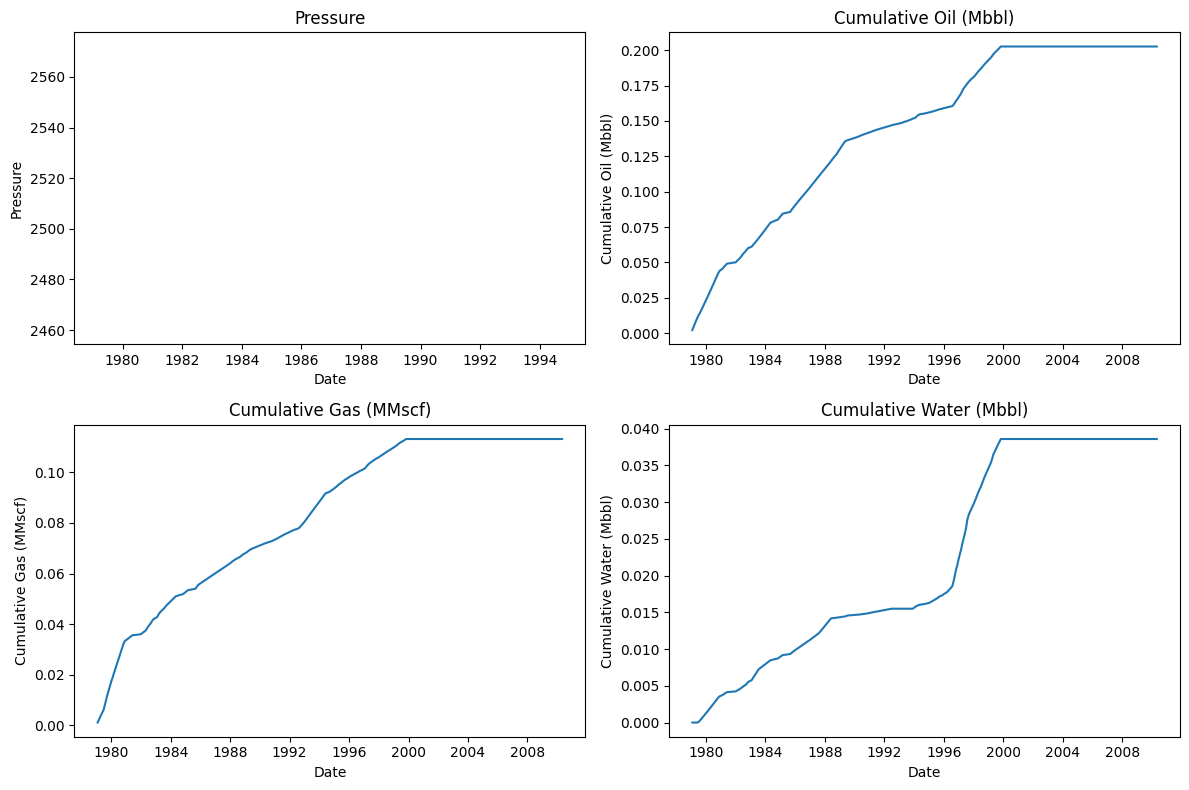

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("forest_data.xlsx", sheet_name="Well 1")
df.head(5)

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

columns = df.columns
for i in range(2):
    for j in range(2):
        column = columns[i * 2 + j]
        axs[i, j].plot(df.index, df[column])
        axs[i, j].set_title(column)
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
oil_df = df[["Date", "Cumulative Oil (Mbbl)"]]
oil_df.head(15)

,Date,Cumulative Oil (Mbbl)
0,1977-04-01,0.000475
1,1977-05-01,0.000999
2,1977-06-01,0.002096
3,1977-07-01,0.004468
4,1977-08-01,0.007826
5,1977-09-01,0.011455
6,1977-10-01,0.014962
7,1977-11-01,0.018385
8,1977-12-01,0.021775
9,1978-01-01,0.025175


In [43]:
oil_df.shape

(333, 2)

In [ ]:
# Assuming 'series_data' is your pandas Series object
series_data = oil_df#pd.Series([0.000475, 0.000999, 0.002096, 0.004468, 0.007826, 0.011455, 0.014962, 0.018385, 0.021775, 0.025175, 0.028509, 0.032024, 0.035497, 0.038798, 0.042089])

# Initialize a figure and axis
fig, ax = plt.subplots()

# Plot the original series data
ax.plot(series_data, label='Original Data')

In [27]:
import pandas as pd
import numpy as np

def create_train_time_series_samples(data, window_size=2):
    X, y = [], []
    for i in range(len(data) - window_size):
        window = data[i:(i + window_size)]
        target = data[i + window_size]
        X.append(window)
        y.append(target)
    return np.array(X), np.array(y)

X, y = create_train_time_series_samples(oil_df, window_size=5)

print("Input (X):")
print(X)
print("\nTarget (y):")
print(y)


Input (X):
[[4.74600e-04 9.99362e-04 2.09616e-03 4.46839e-03 7.82638e-03]
 [9.99362e-04 2.09616e-03 4.46839e-03 7.82638e-03 1.14552e-02]
 [2.09616e-03 4.46839e-03 7.82638e-03 1.14552e-02 1.49619e-02]
 ...
 [5.07912e-01 5.07912e-01 5.07912e-01 5.07912e-01 5.07912e-01]
 [5.07912e-01 5.07912e-01 5.07912e-01 5.07912e-01 5.07912e-01]
 [5.07912e-01 5.07912e-01 5.07912e-01 5.07912e-01 5.07912e-01]]

Target (y):
[0.0114552 0.0149619 0.0183855 0.0217747 0.0251747 0.0285094 0.0320235
 0.0354969 0.0387978 0.0420893 0.045458  0.0487736 0.0520431 0.0552838
 0.0585408 0.0618326 0.0651462 0.0687197 0.072317  0.0759273 0.079683
 0.0834352 0.087186  0.09007   0.0922794 0.0947591 0.0973029 0.0998305
 0.10234   0.104906  0.10749   0.110093  0.112567  0.115152  0.117729
 0.1203    0.122882  0.125474  0.127978  0.13047   0.132052  0.133811
 0.136107  0.138485  0.140648  0.143187  0.145079  0.147392  0.149556
 0.15173   0.153579  0.155217  0.156854  0.158449  0.16006   0.161862
 0.164016  0.166113  0.167775

In [28]:
X.shape, y.shape

((328, 5), (328,))

In [33]:
def create_test_time_series_sample(data, window_size=5):
    X = []
    for i in range(len(data) - window_size):
        window = data[i:(i + window_size)]
        X.append(window)
    return np.array(X[-1]).reshape(1, -1)  # Reshape as a single sample

# Forecasting on a single test sample
single_test_sample = np.array([0.042089, 0.045251, 0.048357, 0.051448, 0.054476])  # Example single test sample
single_test_X = create_test_time_series_sample(single_test_sample, window_size=4)
single_test_X

array([[0.042089, 0.045251, 0.048357, 0.051448]])

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you've already created X, y from the previous step
def train_model(X, y):
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate and print the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    return model, mse

rf_model, mse = train_model(X, y)

Mean Squared Error (MSE): 6.394826557430434e-07


In [35]:
rf_model

RandomForestRegressor(random_state=42)

In [38]:
import matplotlib.pyplot as plt

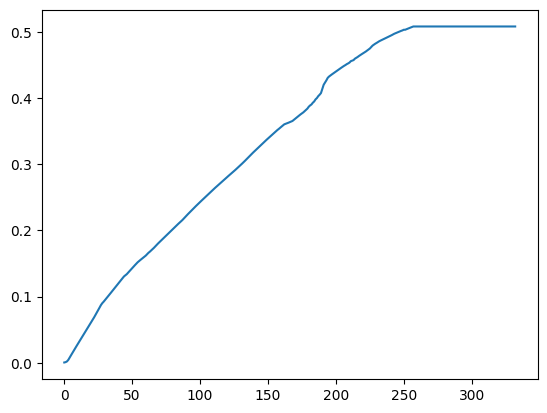

In [ ]:


# Plotting the input data windows
for i in range(len(series_data) - 5):
    window = series_data[i:i + 5]
    ax.plot([i + 5] * len(window), window, 'r-', alpha=0.3)

IndexError: list index out of range

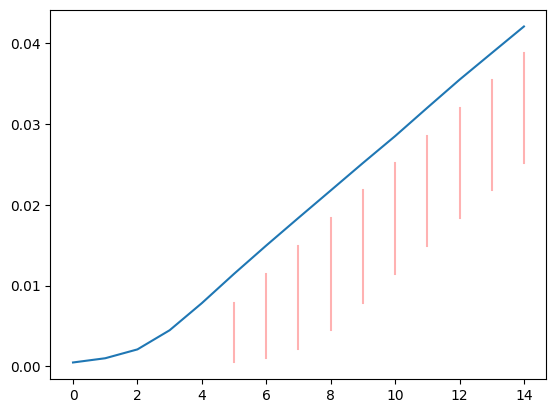

In [37]:


# Set the number of future steps to forecast
num_steps = 4

# Last window from the training data
last_window = series_data[-5:].values

# Store the predictions for plotting
predictions = []

for i in range(num_steps):
    # Create a time series sample from the last window
    future_sample = create_test_time_series_sample(last_window, window_size=5)

    # Predict the next time step
    next_step_prediction = rf_model.predict(future_sample)[0]

    # Append the prediction to the last window for the next iteration
    last_window = np.append(last_window[1:], next_step_prediction)

    # Store the prediction
    predictions.append((len(series_data) - 1) + i)
    ax.plot(len(series_data) + i, next_step_prediction, 'g*', markersize=10)

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Input Data with Windows and Forecast Predictions')

# Show legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
# Forecasting on a small test set (example)
small_test_set = np.array([0.042089, 0.045251, 0.048357, 0.051448, 0.054476])  # Example test set
small_test_X, small_test_y = create_time_series_samples(small_test_set, window_size=5)

# Predict on the small test set
forecast = rf_model.predict(small_test_X)
print("\nForecast on Small Test Set:")
print("Predicted values:", forecast)
print("Actual values:", small_test_y)